## TUGAS Individu 2.  SOLUSI PERSAMAAN NONLINEAR

- Muchammad Yuda Tri Ananda
- 24060124110142
- Kelas D

---

## Nomer 1 EXERCISE SET 2.1 Hal. 54 3.c

Use the Bisection method to find solutions accurate to within $10^{-2}$ for the equation:

$$f(x) = x^3 - 7x^2 + 14x - 6 = 0$$

on each of the following intervals:

**a.** $[0, 1]$

**b.** $[1, 3.2]$

**c. $[3.2, 4]$**

---


Metode bisection digunakan untuk menemukan akar suatu fungsi dengan cara membagi interval menjadi dua bagian.
Ini sangat berguna ketika solusi eksak tidak dapat ditemukan secara aljabar, terutama untuk fungsi kompleks atau tak terdiferensial.
Metode ini sederhana, stabil, dan selalu konvergen jika ada perubahan tanda dalam interval yang diberikan.


=== Metode Bisection ===
Iterasi 1:
  Titik Tengah: c_1 = (3.2 + 4) / 2 = 3.6
  |a - b| = |3.2 - 4| = 0.7999999999999998
  f(c_1) = f(3.6) = 0.336000000000006
  Karena f(c) * f(a) < 0, interval baru: [3.2, 3.6]
--------------------------------------------------
Iterasi 2:
  Titik Tengah: c_2 = (3.2 + 3.6) / 2 = 3.4000000000000004
  |a - b| = |3.2 - 3.6| = 0.3999999999999999
  f(c_2) = f(3.4000000000000004) = -0.0159999999999982
  Karena f(c) * f(b) < 0, interval baru: [3.4000000000000004, 3.6]
--------------------------------------------------
Iterasi 3:
  Titik Tengah: c_3 = (3.4000000000000004 + 3.6) / 2 = 3.5
  |a - b| = |3.4000000000000004 - 3.6| = 0.19999999999999973
  f(c_3) = f(3.5) = 0.125000000000000
  Karena f(c) * f(a) < 0, interval baru: [3.4000000000000004, 3.5]
--------------------------------------------------
Iterasi 4:
  Titik Tengah: c_4 = (3.4000000000000004 + 3.5) / 2 = 3.45
  |a - b| = |3.4000000000000004 - 3.5| = 0.09999999999999964
  f(c_4) = f(3.45) = 0.04612500

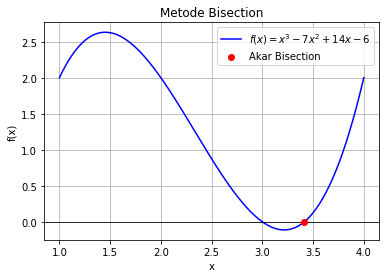

In [28]:
# IMPORT MODULE
from sympy import Symbol, lambdify
import numpy as np
import matplotlib.pyplot as plt

# Definisi variabel simbolik
X = Symbol('x')

# FUNGSI
f = X**3 - 7 * X**2 + 14 * X - 6  

# INTERVAL
a, b = 3.2, 4

# TOLERANSI
tol = 1e-2

def metode_bagi_dua(f, a, b, tol=1e-2):
    # Pastikan ada akar dalam interval (syarat metode bisection)
    if f.subs(X, a) * f.subs(X, b) > 0:
        print("Metode Bisection tidak bisa digunakan: f(a) dan f(b) memiliki tanda yang sama.")
        return None

    print("=== Metode Bisection ===")
    for i in range(100):
        c = (a + b) / 2  # Titik tengah
        f_c = f.subs(X, c)
        f_a = f.subs(X, a)
        f_b = f.subs(X, b)

        print(f"Iterasi {i+1}:")
        print(f"  Titik Tengah: c_{i+1} = ({a} + {b}) / 2 = {c}")
        print(f"  |a - b| = |{a} - {b}| = {abs(a - b)}")
        print(f"  f(c_{i+1}) = f({c}) = {f_c}")

        # Jika akar ditemukan atau sudah mencapai toleransi, berhenti
        if abs(f_c) < tol or abs(a - b) < tol:
            print(f"  Konvergen: Akar ditemukan pada x ≈ {c}\n")
            return c

        # Perbarui interval berdasarkan tanda f(c)
        if f_c * f_a < 0:
            print(f"  Karena f(c) * f(a) < 0, interval baru: [{a}, {c}]")
            b = c
        else:
            print(f"  Karena f(c) * f(b) < 0, interval baru: [{c}, {b}]")
            a = c

        print("-" * 50)  # Separator untuk kejelasan

    return c  # Estimasi terbaik setelah iterasi maksimum

# Menjalankan metode bisection
akar_bisection = metode_bagi_dua(f, a, b, tol)
print("SOLUSI Akar (Metode Bisection):", akar_bisection)

# Plot Grafik Fungsi dan Titik Akar
if akar_bisection is not None:
    f_numeric = lambdify(X, f, "numpy")  # Ubah fungsi menjadi numerik

    x_vals = np.linspace(1, 4, 400)
    y_vals = f_numeric(x_vals)

    plt.figure()
    plt.plot(x_vals, y_vals, label=r'$f(x) = x^3 - 7x^2 + 14x - 6$', color='b')
    plt.axhline(0, color='black', linewidth=0.8)  # Garis sumbu x
    plt.scatter([akar_bisection], [0], color='r', label='Akar Bisection', zorder=3)
    plt.legend()
    plt.title("Metode Bisection")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()


---

## Nomer 2 EXERCISE SET 2.3 Hal. 75 6.d 

Use Newton's method to find solutions accurate to within $10^{-5}$ for the following problems:


**d.** $$(x-2)^2 - \ln(x) = 0$$ for $1 \le x \le 2$ and $e \le x \le 4$

---

Metode Newton-Raphson menggunakan turunan pertama dari fungsi untuk mempercepat konvergensi menuju akar.


=== Metode Newton-Raphson (x0 = 1.5) ===
Iterasi 1: x = 1.500000, f(x) = -0.155465, f'(x) = -1.666667, x_baru = 1.406721
Iterasi 2: x = 1.406721, f(x) = 0.010719, f'(x) = -1.897431, x_baru = 1.412370
Iterasi 3: x = 1.412370, f(x) = 0.000040, f'(x) = -1.883290, x_baru = 1.412391
Iterasi 4: x = 1.412391, f(x) = 0.000000, f'(x) = -1.883237, x_baru = 1.412391
Konvergen: Akar ditemukan pada x ≈ 1.412391


=== Metode Newton-Raphson (x0 = 3) ===
Iterasi 1: x = 3.000000, f(x) = -0.098612, f'(x) = 1.666667, x_baru = 3.059167
Iterasi 2: x = 3.059167, f(x) = 0.003693, f'(x) = 1.791448, x_baru = 3.057106
Iterasi 3: x = 3.057106, f(x) = 0.000004, f'(x) = 1.787105, x_baru = 3.057104
Konvergen: Akar ditemukan pada x ≈ 3.057104



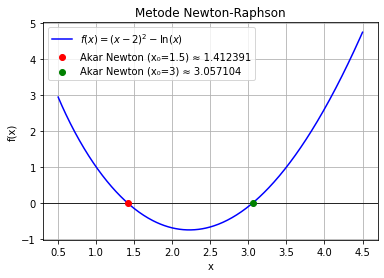

In [ ]:
# IMPORT MODULE
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi f(x) dan turunannya f'(x)
def f(x):
    return (x - 2)**2 - np.log(x)

def df(x):
    return 2 * (x - 2) - 1/x

def metode_newton_raphson(f, df, x0, tol=1e-5, max_iter=100):
    x = x0
    print(f"\n=== Metode Newton-Raphson (x0 = {x0}) ===")
    
    for i in range(1, max_iter + 1):
        f_x = f(x)
        df_x = df(x)
        
        # Cek jika turunan nol (hindari pembagian oleh nol)
        if df_x == 0:
            print(f"Iterasi {i}: Turunan nol! Newton-Raphson gagal.")
            return None

        x_new = x - f_x / df_x

        print(f"Iterasi {i}: x = {x:.6f}, f(x) = {f_x:.6f}, f'(x) = {df_x:.6f}, x_baru = {x_new:.6f}")

        if abs(x_new - x) < tol:
            print(f"Konvergen: Akar ditemukan pada x ≈ {x_new:.6f}\n")
            return x_new

        x = x_new
    
    print("Maksimum iterasi tercapai, hasil terakhir:", x)
    return x

# Interval pertama: 1 ≤ x ≤ 2 (ambil x0 = 1.5)
akar1 = metode_newton_raphson(f, df, x0=1.5)

# Interval kedua: e ≤ x ≤ 4 (ambil x0 = 3)
akar2 = metode_newton_raphson(f, df, x0=3)

# Plot grafik fungsi dan akar
x_vals = np.linspace(0.5, 4.5, 400)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label=r'$f(x) = (x-2)^2 - \ln(x)$', color='b')
plt.axhline(0, color='black', linewidth=0.8)  # Garis sumbu x

# Tandai akar
if akar1 is not None:
    plt.scatter([akar1], [0], color='r', label=f'Akar Newton (x₀=1.5) ≈ {akar1:.6f}', zorder=3)
if akar2 is not None:
    plt.scatter([akar2], [0], color='g', label=f'Akar Newton (x₀=3) ≈ {akar2:.6f}', zorder=3)

plt.legend()
plt.title("Metode Newton-Raphson")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


## Nomer 3 EXERCISE  SET 2.3 Hal. 75  7.c

 Repeat Exercise 5 using the Secant method

Use Secant's method to find solutions accurate to within $10^{-4}$ for the following problems:

**c.** $$x - \cos(x) = 0, \quad [0, \pi/2]$$

---

Metode Secant adalah salah satu metode numerik untuk mencari akar dari suatu fungsi non-linear. Metode ini merupakan pengembangan dari Metode Newton-Raphson, tetapi tidak memerlukan perhitungan turunan, sehingga lebih efisien dalam beberapa kasus.

Langkah-langkah Metode Secant : 
- Pilih dua tebakan awal x0 dan x1.
- Hitung x2​ menggunakan rumus secant.
- Evaluasi f(x2). Jika cukup dekat dengan nol (sesuai toleransi kesalahan), berhenti.
- Jika belum memenuhi toleransi, perbarui x1 = x2 dan x0 = x1, lalu ulangi proses hingga konvergen.

Mencari akar dengan metode Secant di interval [0, π/2]:
Iterasi  x0              x1              x_baru          f(x_baru)      
1        0.0000000000    1.5707963268    0.6110154704    -0.2080503951  
2        1.5707963268    0.6110154704    0.7232695414    -0.0263762877  
3        0.6110154704    0.7232695414    0.7395671070    0.0008067229   
4        0.7232695414    0.7395671070    0.7390834365    -0.0000028396  
5        0.7395671070    0.7390834365    0.7390851330    -0.0000000003  

Akar ditemukan pada x ≈ 0.7390851330 setelah 5 iterasi.



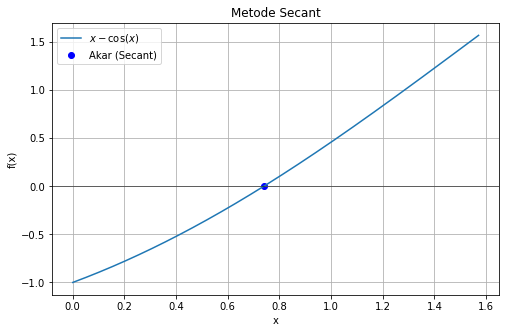

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi yang ingin kita cari akarnya
def f(x):
    return x - np.cos(x)

# Metode Secant dengan log yang lebih baik
def secant_method(f, x0, x1, tol=1e-4, max_iter=100):
    print(f"{'Iterasi':<8} {'x0':<15} {'x1':<15} {'x_baru':<15} {'f(x_baru)':<15}")

    for i in range(1, max_iter + 1):
        f_x0, f_x1 = f(x0), f(x1)
        if f_x1 - f_x0 == 0:
            print("Dibagi dengan nol! Metode gagal.")
            return None

        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        f_xnew = f(x_new)

        print(f"{i:<8} {x0:<15.10f} {x1:<15.10f} {x_new:<15.10f} {f_xnew:<15.10f}")

        if abs(x_new - x1) < tol:
            print(f"\nAkar ditemukan pada x ≈ {x_new:.10f} setelah {i} iterasi.\n")
            return x_new

        x0, x1 = x1, x_new

    print("\nMetode tidak konvergen dalam jumlah iterasi maksimum.")
    return None

# Mencari akar di interval [0, pi/2]
x0, x1 = 0, np.pi / 2

print("Mencari akar dengan metode Secant di interval [0, π/2]:")
root_secant = secant_method(f, x0, x1)

# Visualisasi grafik
x_vals = np.linspace(0, np.pi / 2, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$x - \cos(x)$')
plt.axhline(0, color='black', linewidth=0.5)
if root_secant:
    plt.scatter([root_secant], [0], color='b', label='Akar (Secant)')
plt.legend()
plt.title("Metode Secant")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


# Nomer 4 EXERCISE SET 2.3 Hal. 75 10.c

Repeat Exercise 6 using the method of False Position.

Use False Position method to find solutions accurate to within $10^{-5}$ for the following problems:

**c.** $$2x\cos(2x) - (x-2)^2 = 0$$
for $2 \le x \le 3$ and $3 \le x \le 4$


---

Metode regula falsi adalah variasi dari metode bagi dua, tetapi menggunakan pendekatan garis lurus untuk memperkirakan akar.

Mencari akar di interval [2, 3]:
Iterasi  a               b               c               f(c)           
1        2.0000000000    3.0000000000    2.3544899167    -0.1417166747  
2        2.3544899167    3.0000000000    2.3731487834    0.0216693873   
3        2.3544899167    2.3731487834    2.3706741157    -0.0001125971  
4        2.3706741157    2.3731487834    2.3706869080    -0.0000000853  

Akar ditemukan pada x ≈ 2.3706869080 setelah 4 iterasi.


Mencari akar di interval [3, 4]:
Iterasi  a               b               c               f(c)           
1        3.0000000000    4.0000000000    3.4796988586    3.2384648091   
2        3.4796988586    4.0000000000    3.6802325020    0.6636609839   
3        3.6802325020    4.0000000000    3.7166480044    0.0887765806   
4        3.7166480044    4.0000000000    3.7214369041    0.0110141251   
5        3.7214369041    4.0000000000    3.7220297776    0.0013530372   
6        3.7220297776    4.0000000000    3.7221025904    0.0001660115   

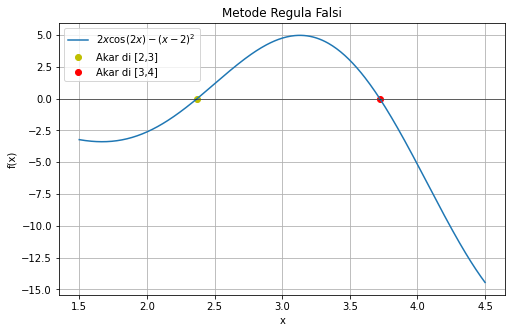

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi yang ingin kita cari akarnya
def f(x):
    return 2 * x * np.cos(2 * x) - (x - 2) ** 2

# Metode Regula Falsi dengan log yang lebih baik
def regula_falsi_method(f, a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) > 0:
        print("Interval yang diberikan tidak memiliki akar atau memiliki akar genap.")
        return None

    print(f"{'Iterasi':<8} {'a':<15} {'b':<15} {'c':<15} {'f(c)':<15}")

    for i in range(1, max_iter + 1):
        c = b - f(b) * (b - a) / (f(b) - f(a))
        f_c = f(c)

        print(f"{i:<8} {a:<15.10f} {b:<15.10f} {c:<15.10f} {f_c:<15.10f}")

        if abs(f_c) < tol:
            print(f"\nAkar ditemukan pada x ≈ {c:.10f} setelah {i} iterasi.\n")
            return c

        if f(a) * f_c < 0:
            b = c  # Akar ada di antara a dan c
        else:
            a = c  # Akar ada di antara c dan b

    print("\nMetode tidak konvergen dalam jumlah iterasi maksimum.")
    return None

# Mencari akar di kedua interval
a1, b1 = 2.0, 3.0
a2, b2 = 3.0, 4.0

print("Mencari akar di interval [2, 3]:")
root_falsi_1 = regula_falsi_method(f, a1, b1)

print("\nMencari akar di interval [3, 4]:")
root_falsi_2 = regula_falsi_method(f, a2, b2)

# Visualisasi grafik
x_vals = np.linspace(1.5, 4.5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$2x\cos(2x) - (x-2)^2$')
plt.axhline(0, color='black', linewidth=0.5)
if root_falsi_1:
    plt.scatter([root_falsi_1], [0], color='y', label='Akar di [2,3]')
if root_falsi_2:
    plt.scatter([root_falsi_2], [0], color='r', label='Akar di [3,4]')
plt.legend()
plt.title("Metode Regula Falsi")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()
